In [3]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [4]:
#loading datasets
train = pd.read_csv('train_prediction.csv')
test = pd.read_csv('test_prediction.csv')

In [5]:
train.tail()

,date,hour,demand
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104
18246,2021-02-28,23,85


In [6]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [7]:
train.shape

(18247, 3)

In [8]:
train['date'].value_counts()

2021-02-28    24
2020-06-08    24
2018-11-05    24
2020-04-05    24
2021-01-08    24
              ..
2019-09-07    11
2018-09-03    10
2018-09-25     9
2019-08-29     9
2018-09-30     7
Name: date, Length: 895, dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


<AxesSubplot:xlabel='hour', ylabel='demand'>

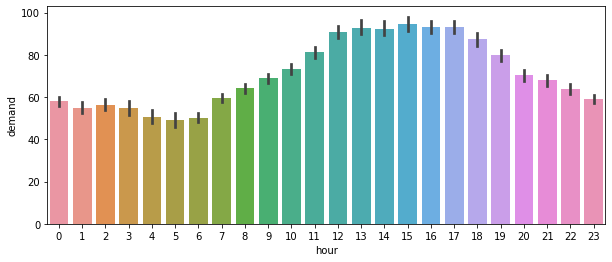

In [10]:
#Set the width and height of the figure
plt.figure(figsize=(10,4))
#Making copy of train data
temp = train.copy()
#Plotting a barplot between Income and Churn possibility
sns.barplot(x='hour',y='demand', data= temp)

The demand for rentals is more post 9 AM.

<AxesSubplot:xlabel='date', ylabel='count'>

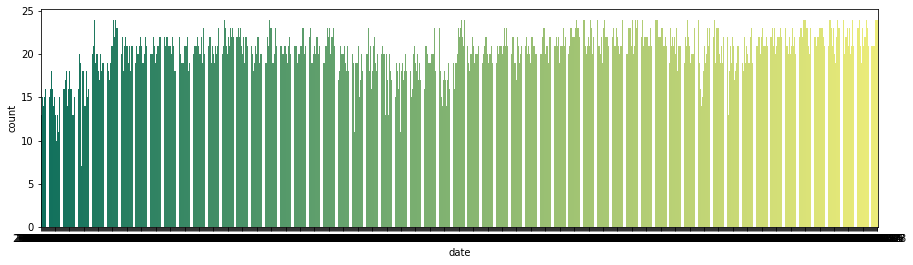

In [11]:
#Set the width and height of the figure
plt.figure(figsize=(15,4))
sns.countplot('date', data= temp, palette= 'summer')

In [12]:
#Splitting the date column into year, month, day and weekday columns. #Feature engineering
temp['date'] = pd.to_datetime(temp['date'],errors='coerce')
temp['year'] = temp['date'].dt.year
temp['month'] = temp['date'].dt.month
temp['day'] = temp['date'].dt.day
temp['weekday'] = temp["date"].dt.weekday

In [13]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     18247 non-null  datetime64[ns]
 1   hour     18247 non-null  int64         
 2   demand   18247 non-null  int64         
 3   year     18247 non-null  int64         
 4   month    18247 non-null  int64         
 5   day      18247 non-null  int64         
 6   weekday  18247 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 998.0 KB


<AxesSubplot:xlabel='weekday', ylabel='count'>

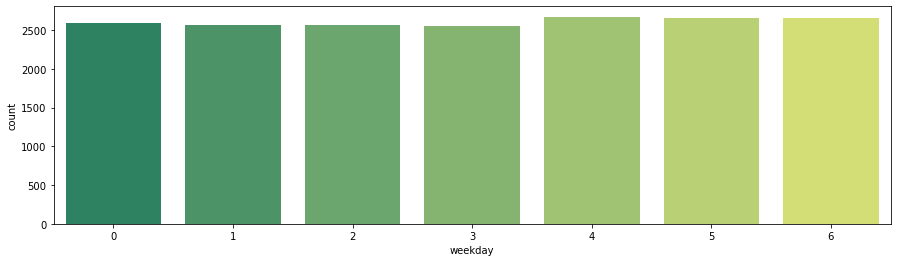

In [14]:
plt.figure(figsize=(15,4))
sns.countplot(temp['weekday'], data= temp, palette= 'summer')

In [15]:
# # Find entries in Jan 2019
# temp2019 = temp[(temp['year'] == 2019) & (temp['month'] == 5)]
# #Set the width and height of the figure
# plt.figure(figsize=(15,4))
# sns.countplot(temp2019['weekday'], data= temp2019, palette= 'summer')

<AxesSubplot:xlabel='month', ylabel='count'>

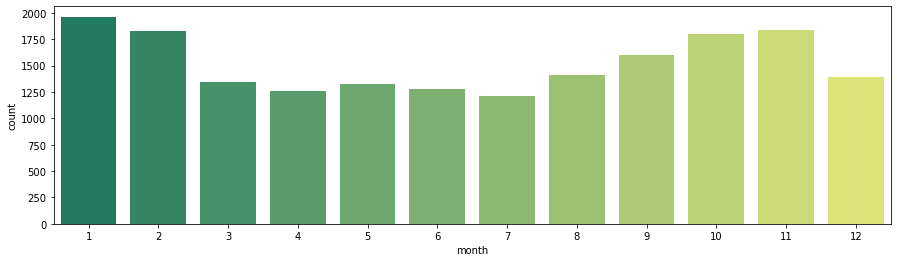

In [16]:
#Set the width and height of the figure
plt.figure(figsize=(15,4))
sns.countplot(temp['month'], data= temp, palette= 'summer')

In [17]:
# #Set the width and height of the figure
# plt.figure(figsize=(15,4))
# sns.countplot(temp['year'], data= temp, palette= 'winter')

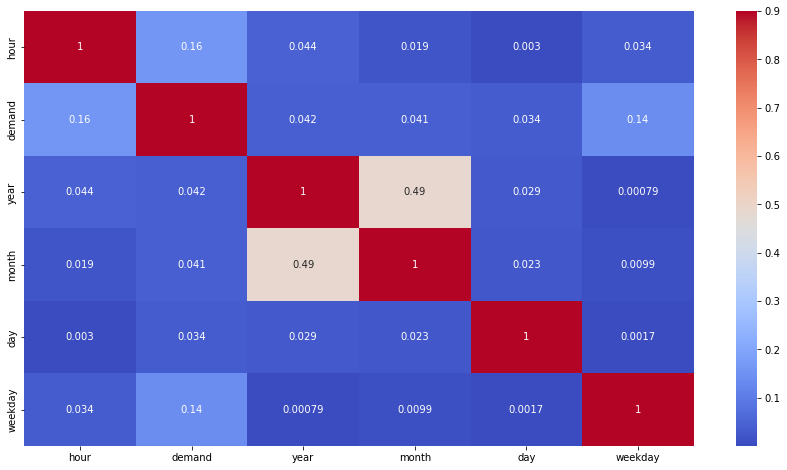

In [18]:
#Correlation matrix with heatmap
corr_matrix = temp.corr()
f, ax1 = plt.subplots(figsize=(15,8)) 
ax1=sns.heatmap(abs(corr_matrix),annot=True,cmap='coolwarm',vmax = 0.9);

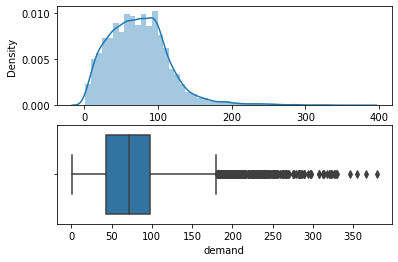

In [19]:
#Checking outliers
def plot(temp,col):
    fig,(ax1,ax2)= plt.subplots(2,1)
    sns.distplot(temp[col],ax=ax1)
    sns.boxplot(temp[col],ax=ax2)
    
plot(temp,'demand')

In [20]:
Date = temp['date']

In [21]:
# Seperate Features and Target
X = temp.drop(['demand','date'], axis=1)
y = temp['demand']

In [22]:
#splitting 20% data for validation
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)


#Checking the dataset split ratio
for dataset in [y_train, y_valid]:
    print(round(len(dataset)/len(y),2))

0.8
0.2


In [61]:
import xgboost as xgb
import lightgbm as lgb

# algos = [xgb.XGBRegressor(eta = 0.09, subsample = 0.8,  eval_metric = 'rmse', seed = 4)]
# names = ['XGBoost']
algos = [lgb.LGBMRegressor(learning_rate = 0.14, seed = 4)]
names = ['LGBM']

rmse_list = []
r2_list = []

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   hour     18247 non-null  int64
 1   year     18247 non-null  int64
 2   month    18247 non-null  int64
 3   day      18247 non-null  int64
 4   weekday  18247 non-null  int64
dtypes: int64(5)
memory usage: 712.9 KB


In [63]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    print(rmse)
    rmse_list.append(rmse)
    score = r2_score(y_valid,y_pred)
    print(score)
    r2_list.append(score)

31.326334623679898
0.40030515770280006


In [60]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list, 'R2 Score':r2_list})
evaluation

,Model,RMSE,R2 Score
0,LGBM,32.317418,0.361759


In [ ]:
plt.figure(figsize=(10,10))
leng = [i for i in range(len(y_pred))]
plt.scatter(leng, y_valid, c='crimson')
plt.scatter(leng, y_pred, c='blue')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y))
p2 = min(min(y_pred), min(y))
# plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
test.head()

In [ ]:
test['date'] = pd.to_datetime(test['date'],errors='coerce')
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test["weekday"] = test["date"].dt.weekday

In [ ]:
test.head()

In [ ]:
test= test.drop(columns= ['date'],axis=1)

In [ ]:
Hours = test['hour']

In [ ]:
test

In [ ]:
submission = pd.read_csv('sample_prediction.csv')
model = algos[0]
model.fit(X, y)
y_pred = model.predict(test)
submission['demand'] = y_pred
submit_test = pd.concat([Date,Hours,pd.DataFrame(y_pred)],axis=1)
submit_test.columns = ['date','hours','demand']
submission.to_csv('my_submission_lgbm.csv', index=False)